In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import kagglehub
path = kagglehub.dataset_download("uciml/autompg-dataset")
print("Path to dataset files:", path)

Path to dataset files: /home/arpan/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3


In [34]:
autompg = pd.read_csv(f"{path}/auto-mpg.csv")
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [35]:
autompg.replace('?', np.nan, inplace=True)
autompg.dropna(inplace=True)
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [36]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [37]:
autompg['horsepower'] = pd.to_numeric(autompg['horsepower'])
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


/tmp/ipykernel_30272/3335656454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = autompg.corr()


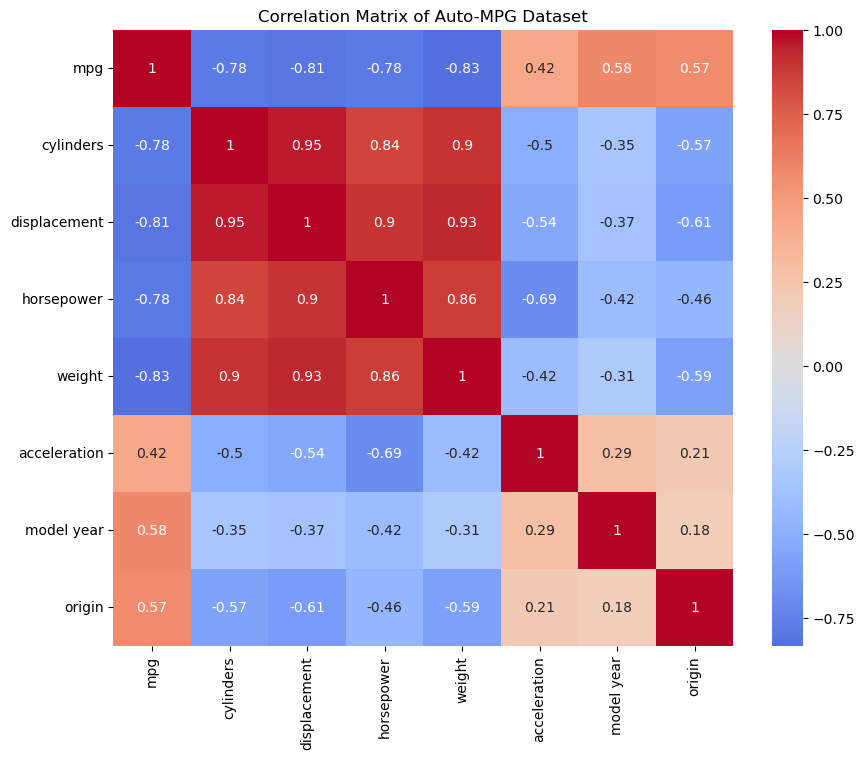

In [38]:
corr_matrix = autompg.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Auto-MPG Dataset')
plt.show()


In [39]:
autompg.drop(columns=['car name'], axis=1, inplace=True)
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


# Linear Regression

Normalize

In [40]:
autompg.apply(pd.to_numeric, errors='coerce')
autompg.dropna(inplace=True)
X = autompg.drop('mpg', axis=1)
y = autompg['mpg']

In [41]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [42]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [43]:
import pandas as pd

def normalize(X):
    # Convert all columns to numeric, coercing errors to NaN
    X = X.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with NaN values
    X.dropna(inplace=True)
    
    # Normalize the DataFrame
    for i in X.columns:
        X.loc[:, i] = (X[i] - X[i].mean()) / X[i].std()
            
    return X

Gradient Descend

In [44]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 1000):
    X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

In [45]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.5 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 392 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


In [46]:
gradient_descend(X,y)


array([23.44490618, -0.51386234, -0.23026897, -1.14164229, -3.40112528,
       -0.2945607 ,  2.62931422,  1.05065825])

# Define Fitness Function

Here we are using $\textbf{Akaike Information Criterion}$ which is given by the formula
    
$AIC = 2k - 2ln(\hat{L})$

where $k$ = number of estimated parameters 
      $\hat{L}$ = maximised value of likelihood function
 

In [47]:
def rss(X,y,theta):
    X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    residual_sum_squares = sum(((X @ theta) - y)**2)
    return residual_sum_squares

def calculate_aic(X,y,theta):
    n = len(y)
    aic = 2 * X.shape[1] + n * np.log(rss(X,y,theta) / n)
    return aic    

In [48]:
calculate_aic(X,y,gradient_descend(X,y))

965.5743836362818

# Generate Parent Population

In [49]:
def parent_pops(X,size):
    papa_pops = []
    for i in range(size):
        feature_arrs = np.random.choice([True,False],size = X.shape[1])
        papa_pops.append(X.iloc[:, np.where(feature_arrs)[0]])
    return papa_pops

In [50]:
parent_pops(autompg, 5)

[      mpg  cylinders  acceleration  origin
 0    18.0          8          12.0       1
 1    15.0          8          11.5       1
 2    18.0          8          11.0       1
 3    16.0          8          12.0       1
 4    17.0          8          10.5       1
 ..    ...        ...           ...     ...
 393  27.0          4          15.6       1
 394  44.0          4          24.6       2
 395  32.0          4          11.6       1
 396  28.0          4          18.6       1
 397  31.0          4          19.4       1
 
 [392 rows x 4 columns],
       mpg  displacement  horsepower  acceleration
 0    18.0         307.0         130          12.0
 1    15.0         350.0         165          11.5
 2    18.0         318.0         150          11.0
 3    16.0         304.0         150          12.0
 4    17.0         302.0         140          10.5
 ..    ...           ...         ...           ...
 393  27.0         140.0          86          15.6
 394  44.0          97.0          52 

# Calculate Fitness Score

In [51]:
def parent_score(parents, y):
    pop_score = {}
    temp_var = 0
    for parent in parents:
        theta1 = gradient_descend(parent, y, learning_rate = 0.01, n_iter = 1000)
        aic = calculate_aic(parent, y, theta1)
        pop_score[temp_var] = aic
        temp_var += 1
    return pop_score

In [52]:
sorted(list(parent_score(parent_pops(autompg, 50), y).values()))

[-1998.4175334509073,
 -1064.2246287024366,
 -994.4614916639274,
 -988.0521513277765,
 -935.0011057813643,
 -885.9953325742708,
 -882.2355631207411,
 -844.7818495257762,
 -843.7141524703198,
 -828.5023835232281,
 -822.584959301131,
 -819.4878740019566,
 -670.5420153926611,
 -646.3158425364726,
 -589.6603249718241,
 -564.3265083515838,
 -555.3760724224512,
 -546.0028293551533,
 -546.0028293551533,
 -507.9782284652341,
 -443.91447023348155,
 -435.5288778832702,
 -435.5288778832702,
 -389.34079062498625,
 -364.28186028782136,
 956.7684095344387,
 962.0780095070375,
 965.5743836362818,
 967.7695174194355,
 974.3246109586364,
 983.1075242692475,
 1079.053455355408,
 1085.6141248025754,
 1091.239097905025,
 1123.5872092372936,
 1123.5872092372936,
 1136.3032517711358,
 1144.836509224661,
 1145.1971694131225,
 1145.1971694131225,
 1147.4820598997883,
 1149.4907617247477,
 1158.9464826747726,
 1174.0885091931905,
 1175.577440554352,
 1175.911605884375,
 1188.6767980393656,
 1204.0693685024953,

# Select n Fittest Parents

In [53]:
# def fittest_parents(population,lamda,y):

#     parent_scores = parent_score(population,y)
#     fittest_parent = []
#     sorted_parents = sorted(parent_scores.items(), key = lambda x:x[1])
#     top_lamda_parents_indices = sorted_parents[:lamda]
#     top_lamda_parents = [item[0] for item in top_lamda_parents_indices]
    
#     for i in top_lamda_parents:
#         fittest_parent.append(population[i])
#     return fittest_parent

In [54]:
def fittest_parents(population, no_parents_selected, y):
    parent_scores = parent_score(population, y)
    sorted_parents = sorted(parent_scores.items(), key=lambda x: x[1], reverse=True)
    unique_parents = []
    selected_indices = set()
    
    for parent, score in sorted_parents:
        if len(unique_parents) >= no_parents_selected:
            break
        if parent not in selected_indices:
            unique_parents.append(parent)
            selected_indices.add(parent)
    
    return unique_parents

In [55]:
parents = parent_pops(X, 5)
parents

[     cylinders  horsepower  model year  origin
 0            8         130          70       1
 1            8         165          70       1
 2            8         150          70       1
 3            8         150          70       1
 4            8         140          70       1
 ..         ...         ...         ...     ...
 393          4          86          82       1
 394          4          52          82       2
 395          4          84          82       1
 396          4          79          82       1
 397          4          82          82       1
 
 [392 rows x 4 columns],
      cylinders  acceleration
 0            8          12.0
 1            8          11.5
 2            8          11.0
 3            8          12.0
 4            8          10.5
 ..         ...           ...
 393          4          15.6
 394          4          24.6
 395          4          11.6
 396          4          18.6
 397          4          19.4
 
 [392 rows x 2 columns],
      disp

In [56]:
fittest_parents(parents, 3, y)

[1, 2, 0]

# Uniform Crossover

In [57]:
def uniform_crossover(X,parent1, parent2):

    # X = data.drop(target_variable, axis = 1)
    parent_list1 = parent1.columns.tolist()
    # temp = 0
    
    bool_arr1 = np.zeros(X.shape[1])
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if np.random.uniform() >= 0.5:
            temp = bool_arr1[i]
            bool_arr1[i] = bool_arr2[i]
            bool_arr2[i] = temp
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]
    return  new_parent1, new_parent2

# Random Bit-Flip Mutation

In [58]:
def rbf_mutation(X,parent1, parent2,mutation_rate):
    
    bool_arr1 = np.zeros(X.shape[1])
    parent_list1 = parent1.columns.tolist()
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr1[i] = 1-bool_arr1[i]
            continue
    for i in range(len(bool_arr2)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr2[i] = 1-bool_arr2[i]
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]    
    
    return new_parent1, new_parent2

In [59]:
# def uniform_crossover(X, parent1, parent2):
#     offspring1 = parent1.copy()
#     offspring2 = parent2.copy()
#     for col in X.columns:
#         if np.random.uniform() < 0.5:
#             offspring1[col], offspring2[col] = offspring2[col], offspring1[col]
#     return offspring1, offspring2

# def rbf_mutation(X, parent1, parent2, mutation_rate):
#     offspring1 = parent1.copy()
#     offspring2 = parent2.copy()
#     for col in X.columns:
#         if np.random.uniform() < mutation_rate:
#             offspring1[col] += np.random.normal(0, 1) * X[col].std()
#         if np.random.uniform() < mutation_rate:
#             offspring2[col] += np.random.normal(0, 1) * X[col].std()
#     return offspring1, offspring2

# The $(\mu , \lambda)$ Genetic Algorithm



In [60]:
def gen_alg(X, y, pop_size, no_parents_selected, iterations, mutation_rate): 
    population = parent_pops(X, pop_size)
    
    for z in range(iterations):
        print("iteration:", z)
        parents = fittest_parents(population, no_parents_selected, y)
        print("parents:", parents)
        new_gen = []
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.uniform() < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
                
        population = new_gen

    return fittest_parents(population, 1, y)


In [78]:
def fittest_parents(population, no_parents_selected, y):
    parent_scores = parent_score(population, y)
    sorted_parents = sorted(parent_scores.items(), key=lambda x: x[1], reverse=True)
    unique_parents = []
    selected_indices = set()
    
    for parent_idx, score in sorted_parents:
        if len(unique_parents) >= no_parents_selected:
            break
        parent = population[parent_idx]
        parent_tuple = tuple(parent.values.flatten())
        if parent_tuple not in selected_indices:
            unique_parents.append(parent)
            selected_indices.add(parent_tuple)
    
    print(f"Selected {len(unique_parents)} unique parents out of {no_parents_selected} requested.")
    return unique_parents

def uniform_crossover(X, parent1, parent2):
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()
    for col in X.columns:
        if np.random.uniform() < 0.5:
            offspring1[col], offspring2[col] = offspring2[col], offspring1[col]
    return offspring1, offspring2

def rbf_mutation(X, parent1, parent2, mutation_rate):
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()
    for col in X.columns:
        if np.random.uniform() < mutation_rate:
            offspring1[col] += np.random.normal(0, 1) * X[col].std()
        if np.random.uniform() < mutation_rate:
            offspring2[col] += np.random.normal(0, 1) * X[col].std()
    return offspring1, offspring2

def gen_alg(X, y, pop_size, no_parents_selected, iterations, mutation_rate): 
    print("Columns in X:", X.columns)
    population = parent_pops(X, pop_size)
    
    for z in range(iterations):
        print("iteration:", z)
        parents = fittest_parents(population, no_parents_selected, y)
        print("parents:", parents)
        new_gen = []
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.uniform() < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
                
        population = new_gen

    return fittest_parents(population, 1, y)

# Test the gen_alg function
# Ensure 'horsepower' column is included in X
# Define the missing variables
pop_size = 50
no_parents_selected = 10
iterations = 100
mutation_rate = 0.01

# Ensure 'horsepower', 'cylinders', and 'displacement' columns are included in X
# Ensure 'weight' column is included in X
if 'weight' not in X.columns:
    X['weight'] = autompg['weight']

# Ensure 'horsepower', 'cylinders', and 'displacement' columns are included in X
# Ensure 'horsepower', 'cylinders', 'displacement', and 'weight' columns are included in X
if 'horsepower' not in X.columns:
    X['horsepower'] = autompg['horsepower']
if 'cylinders' not in X.columns:
    X['cylinders'] = autompg['cylinders']
if 'displacement' not in X.columns:
    X['displacement'] = autompg['displacement']
if 'weight' not in X.columns:
    X['weight'] = autompg['weight']

# Run the genetic algorithm
fittest_parent = gen_alg(X, y, pop_size, no_parents_selected, iterations, mutation_rate)

# Print the fittest parent
print("Fittest Parent:")
fittest_parent


Columns in X: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')
iteration: 0
Selected 10 unique parents out of 10 requested.
parents: [     horsepower
0           130
1           165
2           150
3           150
4           140
..          ...
393          86
394          52
395          84
396          79
397          82

[392 rows x 1 columns],      cylinders  displacement  acceleration
0            8         307.0          12.0
1            8         350.0          11.5
2            8         318.0          11.0
3            8         304.0          12.0
4            8         302.0          10.5
..         ...           ...           ...
393          4         140.0          15.6
394          4          97.0          24.6
395          4         135.0          11.6
396          4         120.0          18.6
397          4         119.0          19.4

[392 rows x 3 columns],      displacement
0        

KeyError: 'displacement'

In [64]:
calculate_aic(fittest_parent[0], y, gradient_descend(fittest_parent[0], y))

1609.9348912504242